In [1]:
!pip install librosa

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
filename = "Dog_bark.wav"

In [4]:
import IPython.display as ipd
import librosa
import librosa.display

In [5]:
!dir D:\panda\UrbanSound8K

 Volume in drive D is New Volume
 Volume Serial Number is E0B8-7FB3

 Directory of D:\panda\UrbanSound8K

31-01-2024  00:16    <DIR>          .
30-01-2024  23:12    <DIR>          ..
20-05-2014  00:28            15,364 .DS_Store
20-05-2014  00:43    <DIR>          audio
20-05-2014  00:35           705,644 Children_sound.wav
20-05-2014  00:29           705,644 Dog_bark.wav
20-05-2014  00:45            26,155 FREESOUNDCREDITS.txt
20-05-2014  00:35           206,432 gun_sound.wav
28-05-2014  19:45    <DIR>          metadata
04-06-2014  03:40             4,932 UrbanSound8K_README.txt
               6 File(s)      1,664,171 bytes
               4 Dir(s)  195,063,558,144 bytes free


In [6]:
print(librosa. __version__)

0.10.1


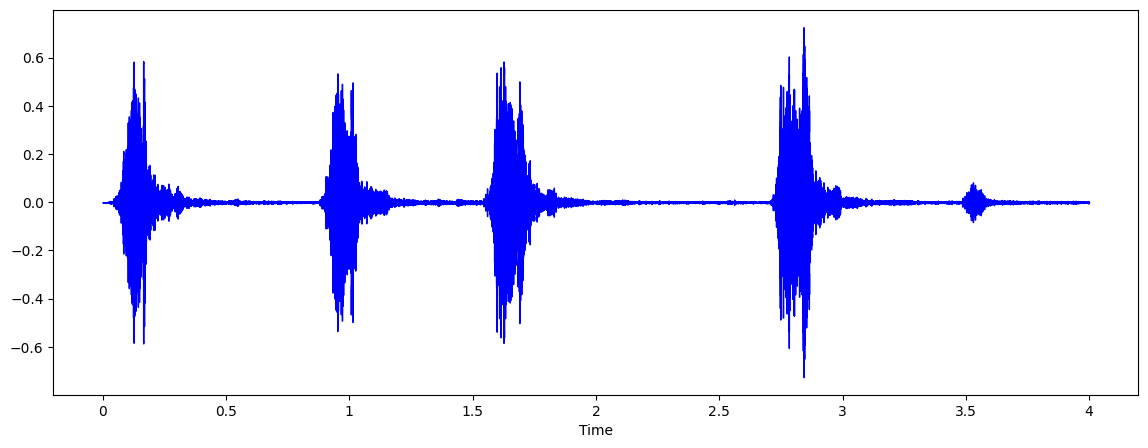

In [7]:
plt.figure(figsize=(14,5))
data,sample_rate = librosa.load(filename)
librosa.display.waveshow(data,sr=sample_rate,color='b') ## waveplot is present in versions librosa 0.8.1 and 0.6.0.
ipd.Audio(filename)

In [8]:
sample_rate

22050

In [9]:
data ##Output is normalized between -1 to 1

array([ 1.4551915e-10, -8.7311491e-11, -1.1641532e-10, ...,
        3.6435030e-04,  2.6052771e-04, -2.1291785e-04], dtype=float32)

In [10]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(filename)

In [11]:
wave_sample_rate

44100

In [12]:
wave_audio ##Output is not normalized

array([[  0,   0],
       [  0,   0],
       [  0,   0],
       ...,
       [  6,  -5],
       [  7, -17],
       [ -5, -21]], dtype=int16)

In [13]:
import pandas as pd

In [14]:
metadata = pd.read_csv("D:\\panda\\UrbanSound8K\\metadata\\UrbanSound8K.csv")

In [15]:
metadata.head(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


In [16]:
## Check whether dataset is unbalanced or not
metadata['class'].value_counts()

class
dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: count, dtype: int64

### Data preprocessing

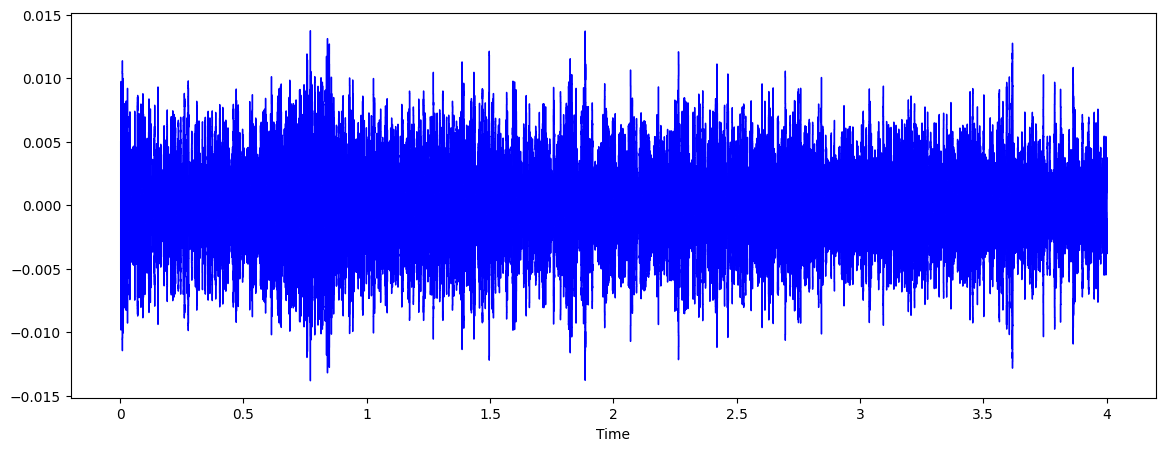

In [17]:
## Children sound
audio_file_path = "Children_sound.wav"
plt.figure(figsize=(14,5))
librosa_audio_data,librosa_sample_rate = librosa.load(audio_file_path)
librosa.display.waveshow(librosa_audio_data,sr=librosa_sample_rate,color='b') ## waveplot is present in versions librosa 0.8.1 and 0.6.0.
ipd.Audio(audio_file_path)

In [18]:
print(librosa_audio_data)

[ 0.00331575  0.00467553  0.00361099 ... -0.00376796 -0.00347471
 -0.00357828]


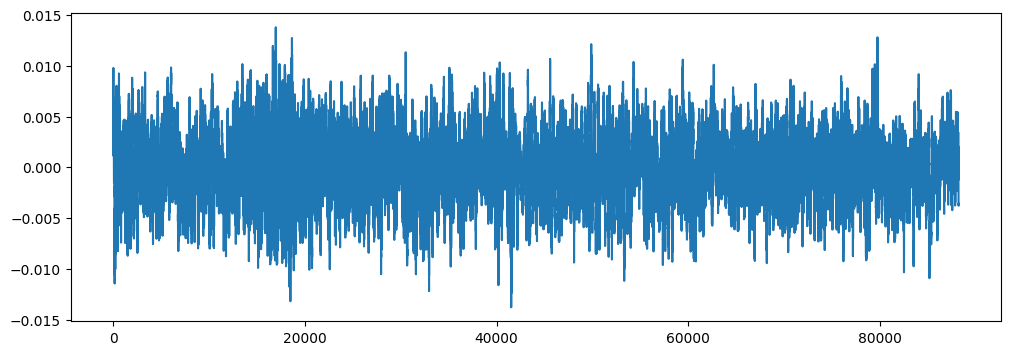

In [19]:
### Lets plot the Librosa audio data
import matplotlib.pyplot as plt
# Original audio with 1 channel
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

### Obseravtion
Here Librosa converts the signal to mono, meaning the channel will always be 1

### Let's read a sample audio using scipy

In [20]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path)

In [21]:
wave_audio

array([[ 194,  100],
       [ 179,  113],
       [ 160,  124],
       ...,
       [-143,  -87],
       [-134,  -91],
       [-110,  -98]], dtype=int16)

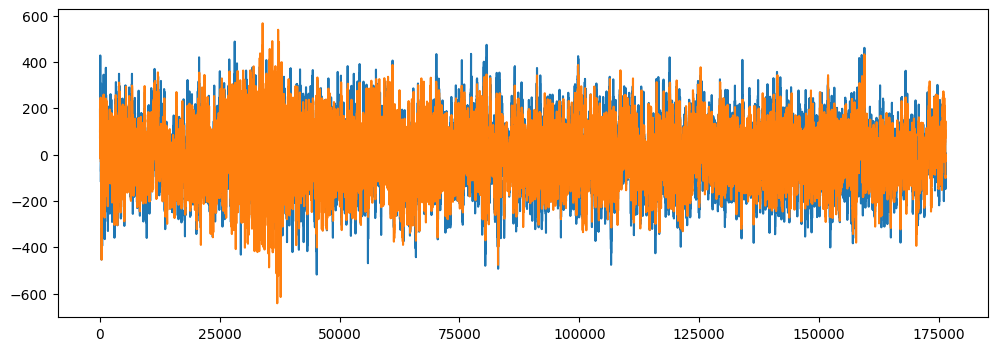

In [22]:
import matplotlib as pyplot

#Original audio with 2 channels
plt.figure(figsize=(12,4))
plt.plot(wave_audio)

## Extract features

Extract Features
Here we will be using
(MFCC) from the audio samples. The
MFCC summarises the frequency distribution across the window size, so it is possible to analyse
both the frequency and time characteristics of the sound. These audio representations will allow
us to identify features for classification.

In [23]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 173)


In [24]:
mfccs

array([[-4.7486273e+02, -4.5088608e+02, -4.4905338e+02, ...,
        -4.7676157e+02, -4.7334869e+02, -4.9085263e+02],
       [ 1.1530264e+02,  1.1144249e+02,  1.1125224e+02, ...,
         1.1112500e+02,  1.1057970e+02,  1.0299151e+02],
       [-1.8326149e+01, -2.4682455e+01, -3.0259777e+01, ...,
        -8.2357597e+00, -9.0665350e+00, -4.5019560e+00],
       ...,
       [-2.8760438e+00, -3.2479761e+00, -4.8965530e+00, ...,
        -5.2023613e-01,  3.5672503e+00,  7.4937558e+00],
       [-4.2968374e-01, -5.8838749e-01, -8.1724131e-01, ...,
         1.8340763e-01,  7.6732612e-01,  2.7120004e+00],
       [-1.1780634e+00,  6.9809413e-01,  6.3521609e+00, ...,
        -2.6221936e+00, -4.7912698e+00, -3.1826305e+00]], dtype=float32)

In [25]:
!pip install resampy

In [26]:
## Extracting MFCCs for every audio file
import pandas as pd
import os
import librosa

In [27]:
audio_dataset_path = 'D:\\panda\\UrbanSound8K\\audio'
metadata = pd.read_csv('D:\\panda\\UrbanSound8K\\metadata\\UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [28]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [29]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

3554it [04:38, 12.34it/s]C:\Users\abhin\AppData\Roaming\Python\Python310\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
8324it [10:34, 17.11it/s]C:\Users\abhin\AppData\Roaming\Python\Python310\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
C:\Users\abhin\AppData\Roaming\Python\Python310\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
8732it [11:03, 13.17it/s]


### Converting extracted features to pandas dataframe

In [30]:
extracted_features_df = pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-217.35526, 70.22339, -130.38527, -53.282898,...",dog_bark
1,"[-424.09818, 109.34077, -52.919525, 60.86475, ...",children_playing
2,"[-458.79114, 121.38419, -46.520657, 52.00812, ...",children_playing
3,"[-413.89984, 101.66371, -35.42945, 53.036358, ...",children_playing
4,"[-446.60352, 113.68541, -52.402218, 60.302044,...",children_playing


### Split the dataset into independent and dependent dataset

In [31]:
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [32]:
X.shape

(8732, 40)

In [33]:
### Label Encoding
##y=np.array(pd.get_dummies(y))
### Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [34]:
y.shape

(8732, 10)

In [35]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [36]:
## Train-test-split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [37]:
X_train

array([[-1.31104706e+02,  1.12505905e+02, -2.25746956e+01, ...,
         3.24665213e+00, -1.36902368e+00,  2.75575471e+00],
       [-1.36703424e+01,  9.10850830e+01, -7.79273319e+00, ...,
        -3.25305033e+00, -5.27745295e+00, -1.55697179e+00],
       [-4.98715439e+01,  2.65352994e-01, -2.05009365e+01, ...,
         2.85459447e+00, -1.60920441e+00,  3.52480578e+00],
       ...,
       [-4.27012360e+02,  9.26230469e+01,  3.12939739e+00, ...,
         7.42641211e-01,  7.33490884e-01,  7.11009145e-01],
       [-1.45754608e+02,  1.36265778e+02, -3.35155182e+01, ...,
         1.46811938e+00, -2.00917006e+00, -8.82181883e-01],
       [-4.21031342e+02,  2.10654541e+02,  3.49066091e+00, ...,
        -5.38886738e+00, -3.37136054e+00, -1.56651139e+00]], dtype=float32)

In [38]:
y_train

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [39]:
X_train.shape

(6985, 40)

In [40]:
X_test.shape

(1747, 40)

In [41]:
y_train.shape

(6985, 10)

In [42]:
y_test.shape

(1747, 10)

## Model Creation

In [43]:
import tensorflow as tf

In [44]:
print(tf.__version__)

2.15.0


In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [46]:
## No. of classes
num_labels=y.shape[1]

In [47]:
model=Sequential()
## first layer
model.add(Dense(units=100, input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

## second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))

## third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

## final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [48]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               2

In [49]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

### Training my model

In [50]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='', verbose=1, save_best_only=True)

start = datetime.now()

model.fit(X_train,y_train,batch_size=num_batch_size,epochs=num_epochs, validation_data=(X_test,y_test), callbacks=[checkpointer])

duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100


217/219 [============================>.] - ETA: 0s - loss: 9.3322 - accuracy: 0.1273
Epoch 1: val_loss improved from inf to 2.28423, saving model to 
INFO:tensorflow:Assets written to: assets


INFO:tensorflow:Assets written to: assets


219/219 [==============================] - 6s 17ms/step - loss: 9.2982 - accuracy: 0.1268 - val_loss: 2.2842 - val_accuracy: 0.1128
Epoch 2/100
211/219 [===========================>..] - ETA: 0s - loss: 2.5380 - accuracy: 0.1324
Epoch 2: val_loss improved from 2.28423 to 2.27206, saving model to 
INFO:tensorflow:Assets written to: assets


INFO:tensorflow:Assets written to: assets


219/219 [==============================] - 3s 12ms/step - loss: 2.5330 - accuracy: 0.1310 - val_loss: 2.2721 - val_accuracy: 0.1082
Epoch 3/100
211/219 [===========================>..] - ETA: 0s - loss: 2.3135 - accuracy: 0.1351
Epoch 3: val_loss improved from 2.27206 to 2.24780, saving model to 
INFO:tensorflow:Assets written to: assets


INFO:tensorflow:Assets written to: assets


219/219 [==============================] - 3s 13ms/step - loss: 2.3109 - accuracy: 0.1350 - val_loss: 2.2478 - val_accuracy: 0.1603
Epoch 4/100
215/219 [============================>.] - ETA: 0s - loss: 2.2530 - accuracy: 0.1631
Epoch 4: val_loss improved from 2.24780 to 2.17938, saving model to 
INFO:tensorflow:Assets written to: assets


INFO:tensorflow:Assets written to: assets


219/219 [==============================] - 2s 10ms/step - loss: 2.2529 - accuracy: 0.1622 - val_loss: 2.1794 - val_accuracy: 0.1923
Epoch 5/100
211/219 [===========================>..] - ETA: 0s - loss: 2.2137 - accuracy: 0.1819
Epoch 5: val_loss improved from 2.17938 to 2.11470, saving model to 
INFO:tensorflow:Assets written to: assets


INFO:tensorflow:Assets written to: assets


219/219 [==============================] - 3s 12ms/step - loss: 2.2108 - accuracy: 0.1827 - val_loss: 2.1147 - val_accuracy: 0.2129
Epoch 6/100
208/219 [===========================>..] - ETA: 0s - loss: 2.1349 - accuracy: 0.2154
Epoch 6: val_loss improved from 2.11470 to 2.04334, saving model to 
INFO:tensorflow:Assets written to: assets


INFO:tensorflow:Assets written to: assets


219/219 [==============================] - 2s 11ms/step - loss: 2.1348 - accuracy: 0.2172 - val_loss: 2.0433 - val_accuracy: 0.2553
Epoch 7/100
213/219 [============================>.] - ETA: 0s - loss: 2.0885 - accuracy: 0.2371
Epoch 7: val_loss improved from 2.04334 to 1.96937, saving model to 
INFO:tensorflow:Assets written to: assets


INFO:tensorflow:Assets written to: assets


219/219 [==============================] - 3s 13ms/step - loss: 2.0899 - accuracy: 0.2369 - val_loss: 1.9694 - val_accuracy: 0.3102
Epoch 8/100
209/219 [===========================>..] - ETA: 0s - loss: 2.0460 - accuracy: 0.2460
Epoch 8: val_loss improved from 1.96937 to 1.90792, saving model to 
INFO:tensorflow:Assets written to: assets


INFO:tensorflow:Assets written to: assets


219/219 [==============================] - 3s 13ms/step - loss: 2.0420 - accuracy: 0.2471 - val_loss: 1.9079 - val_accuracy: 0.3005
Epoch 9/100
219/219 [==============================] - ETA: 0s - loss: 1.9722 - accuracy: 0.2802
Epoch 9: val_loss improved from 1.90792 to 1.77357, saving model to 
INFO:tensorflow:Assets written to: assets


INFO:tensorflow:Assets written to: assets


219/219 [==============================] - 2s 11ms/step - loss: 1.9722 - accuracy: 0.2802 - val_loss: 1.7736 - val_accuracy: 0.3852
Epoch 10/100
211/219 [===========================>..] - ETA: 0s - loss: 1.9128 - accuracy: 0.3057
Epoch 10: val_loss improved from 1.77357 to 1.73327, saving model to 
INFO:tensorflow:Assets written to: assets


INFO:tensorflow:Assets written to: assets


219/219 [==============================] - 2s 11ms/step - loss: 1.9147 - accuracy: 0.3052 - val_loss: 1.7333 - val_accuracy: 0.4242
Epoch 11/100
216/219 [============================>.] - ETA: 0s - loss: 1.8605 - accuracy: 0.3244
Epoch 11: val_loss improved from 1.73327 to 1.66301, saving model to 
INFO:tensorflow:Assets written to: assets


INFO:tensorflow:Assets written to: assets


219/219 [==============================] - 2s 11ms/step - loss: 1.8598 - accuracy: 0.3244 - val_loss: 1.6630 - val_accuracy: 0.4327
Epoch 12/100
212/219 [============================>.] - ETA: 0s - loss: 1.7946 - accuracy: 0.3470
Epoch 12: val_loss improved from 1.66301 to 1.57096, saving model to 
INFO:tensorflow:Assets written to: assets


INFO:tensorflow:Assets written to: assets


219/219 [==============================] - 2s 10ms/step - loss: 1.7930 - accuracy: 0.3485 - val_loss: 1.5710 - val_accuracy: 0.4659
Epoch 13/100
217/219 [============================>.] - ETA: 0s - loss: 1.7483 - accuracy: 0.3760
Epoch 13: val_loss improved from 1.57096 to 1.52134, saving model to 
INFO:tensorflow:Assets written to: assets


INFO:tensorflow:Assets written to: assets


219/219 [==============================] - 2s 10ms/step - loss: 1.7481 - accuracy: 0.3761 - val_loss: 1.5213 - val_accuracy: 0.5043
Epoch 14/100
217/219 [============================>.] - ETA: 0s - loss: 1.7080 - accuracy: 0.3900
Epoch 14: val_loss improved from 1.52134 to 1.50083, saving model to 
INFO:tensorflow:Assets written to: assets


INFO:tensorflow:Assets written to: assets


219/219 [==============================] - 3s 11ms/step - loss: 1.7092 - accuracy: 0.3897 - val_loss: 1.5008 - val_accuracy: 0.4940
Epoch 15/100
215/219 [============================>.] - ETA: 0s - loss: 1.6653 - accuracy: 0.4087
Epoch 15: val_loss improved from 1.50083 to 1.46811, saving model to 
INFO:tensorflow:Assets written to: assets


INFO:tensorflow:Assets written to: assets


219/219 [==============================] - 2s 10ms/step - loss: 1.6646 - accuracy: 0.4080 - val_loss: 1.4681 - val_accuracy: 0.5049
Epoch 16/100
210/219 [===========================>..] - ETA: 0s - loss: 1.6192 - accuracy: 0.4254
Epoch 16: val_loss improved from 1.46811 to 1.39017, saving model to 
INFO:tensorflow:Assets written to: assets


INFO:tensorflow:Assets written to: assets


219/219 [==============================] - 2s 10ms/step - loss: 1.6196 - accuracy: 0.4249 - val_loss: 1.3902 - val_accuracy: 0.5341
Epoch 17/100
214/219 [============================>.] - ETA: 0s - loss: 1.5731 - accuracy: 0.4455
Epoch 17: val_loss improved from 1.39017 to 1.36075, saving model to 
INFO:tensorflow:Assets written to: assets


INFO:tensorflow:Assets written to: assets


219/219 [==============================] - 2s 10ms/step - loss: 1.5700 - accuracy: 0.4465 - val_loss: 1.3608 - val_accuracy: 0.5541
Epoch 18/100
213/219 [============================>.] - ETA: 0s - loss: 1.5451 - accuracy: 0.4619
Epoch 18: val_loss improved from 1.36075 to 1.32326, saving model to 
INFO:tensorflow:Assets written to: assets


INFO:tensorflow:Assets written to: assets


219/219 [==============================] - 2s 10ms/step - loss: 1.5472 - accuracy: 0.4598 - val_loss: 1.3233 - val_accuracy: 0.5793
Epoch 19/100
214/219 [============================>.] - ETA: 0s - loss: 1.5166 - accuracy: 0.4676
Epoch 19: val_loss did not improve from 1.32326
219/219 [==============================] - 1s 6ms/step - loss: 1.5165 - accuracy: 0.4671 - val_loss: 1.3289 - val_accuracy: 0.5736
Epoch 20/100
212/219 [============================>.] - ETA: 0s - loss: 1.4888 - accuracy: 0.4817
Epoch 20: val_loss improved from 1.32326 to 1.26609, saving model to 
INFO:tensorflow:Assets written to: assets


INFO:tensorflow:Assets written to: assets


219/219 [==============================] - 2s 11ms/step - loss: 1.4883 - accuracy: 0.4815 - val_loss: 1.2661 - val_accuracy: 0.5884
Epoch 21/100
217/219 [============================>.] - ETA: 0s - loss: 1.4783 - accuracy: 0.4829
Epoch 21: val_loss did not improve from 1.26609
219/219 [==============================] - 1s 6ms/step - loss: 1.4787 - accuracy: 0.4826 - val_loss: 1.2737 - val_accuracy: 0.5736
Epoch 22/100
218/219 [============================>.] - ETA: 0s - loss: 1.4466 - accuracy: 0.4954
Epoch 22: val_loss improved from 1.26609 to 1.23616, saving model to 
INFO:tensorflow:Assets written to: assets


INFO:tensorflow:Assets written to: assets


219/219 [==============================] - 2s 11ms/step - loss: 1.4456 - accuracy: 0.4956 - val_loss: 1.2362 - val_accuracy: 0.6085
Epoch 23/100
219/219 [==============================] - ETA: 0s - loss: 1.3991 - accuracy: 0.5147
Epoch 23: val_loss improved from 1.23616 to 1.17557, saving model to 
INFO:tensorflow:Assets written to: assets


INFO:tensorflow:Assets written to: assets


219/219 [==============================] - 2s 11ms/step - loss: 1.3991 - accuracy: 0.5147 - val_loss: 1.1756 - val_accuracy: 0.6251
Epoch 24/100
211/219 [===========================>..] - ETA: 0s - loss: 1.4058 - accuracy: 0.5132
Epoch 24: val_loss improved from 1.17557 to 1.17293, saving model to 
INFO:tensorflow:Assets written to: assets


INFO:tensorflow:Assets written to: assets


219/219 [==============================] - 2s 11ms/step - loss: 1.4057 - accuracy: 0.5111 - val_loss: 1.1729 - val_accuracy: 0.6142
Epoch 25/100
213/219 [============================>.] - ETA: 0s - loss: 1.3435 - accuracy: 0.5401
Epoch 25: val_loss improved from 1.17293 to 1.15874, saving model to 
INFO:tensorflow:Assets written to: assets


INFO:tensorflow:Assets written to: assets


219/219 [==============================] - 2s 11ms/step - loss: 1.3423 - accuracy: 0.5404 - val_loss: 1.1587 - val_accuracy: 0.6314
Epoch 26/100
218/219 [============================>.] - ETA: 0s - loss: 1.3686 - accuracy: 0.5366
Epoch 26: val_loss did not improve from 1.15874
219/219 [==============================] - 1s 6ms/step - loss: 1.3689 - accuracy: 0.5364 - val_loss: 1.1756 - val_accuracy: 0.6245
Epoch 27/100
218/219 [============================>.] - ETA: 0s - loss: 1.3285 - accuracy: 0.5378
Epoch 27: val_loss improved from 1.15874 to 1.15175, saving model to 
INFO:tensorflow:Assets written to: assets


INFO:tensorflow:Assets written to: assets


219/219 [==============================] - 2s 10ms/step - loss: 1.3285 - accuracy: 0.5380 - val_loss: 1.1517 - val_accuracy: 0.6285
Epoch 28/100
217/219 [============================>.] - ETA: 0s - loss: 1.3115 - accuracy: 0.5482
Epoch 28: val_loss improved from 1.15175 to 1.14949, saving model to 
INFO:tensorflow:Assets written to: assets


INFO:tensorflow:Assets written to: assets


219/219 [==============================] - 2s 10ms/step - loss: 1.3100 - accuracy: 0.5490 - val_loss: 1.1495 - val_accuracy: 0.6262
Epoch 29/100
211/219 [===========================>..] - ETA: 0s - loss: 1.3071 - accuracy: 0.5520
Epoch 29: val_loss improved from 1.14949 to 1.14929, saving model to 
INFO:tensorflow:Assets written to: assets


INFO:tensorflow:Assets written to: assets


219/219 [==============================] - 2s 10ms/step - loss: 1.3109 - accuracy: 0.5525 - val_loss: 1.1493 - val_accuracy: 0.6142
Epoch 30/100
209/219 [===========================>..] - ETA: 0s - loss: 1.2858 - accuracy: 0.5523
Epoch 30: val_loss improved from 1.14929 to 1.07627, saving model to 
INFO:tensorflow:Assets written to: assets


INFO:tensorflow:Assets written to: assets


219/219 [==============================] - 2s 11ms/step - loss: 1.2846 - accuracy: 0.5532 - val_loss: 1.0763 - val_accuracy: 0.6480
Epoch 31/100
215/219 [============================>.] - ETA: 0s - loss: 1.2730 - accuracy: 0.5600
Epoch 31: val_loss improved from 1.07627 to 1.07576, saving model to 
INFO:tensorflow:Assets written to: assets


INFO:tensorflow:Assets written to: assets


219/219 [==============================] - 2s 11ms/step - loss: 1.2718 - accuracy: 0.5613 - val_loss: 1.0758 - val_accuracy: 0.6560
Epoch 32/100
214/219 [============================>.] - ETA: 0s - loss: 1.2566 - accuracy: 0.5729
Epoch 32: val_loss did not improve from 1.07576
219/219 [==============================] - 1s 6ms/step - loss: 1.2538 - accuracy: 0.5742 - val_loss: 1.0843 - val_accuracy: 0.6411
Epoch 33/100
214/219 [============================>.] - ETA: 0s - loss: 1.2432 - accuracy: 0.5729
Epoch 33: val_loss did not improve from 1.07576
219/219 [==============================] - 1s 6ms/step - loss: 1.2439 - accuracy: 0.5727 - val_loss: 1.0828 - val_accuracy: 0.6457
Epoch 34/100
219/219 [==============================] - ETA: 0s - loss: 1.2323 - accuracy: 0.5794
Epoch 34: val_loss improved from 1.07576 to 1.05038, saving model to 
INFO:tensorflow:Assets written to: assets


INFO:tensorflow:Assets written to: assets


219/219 [==============================] - 3s 12ms/step - loss: 1.2323 - accuracy: 0.5794 - val_loss: 1.0504 - val_accuracy: 0.6514
Epoch 35/100
211/219 [===========================>..] - ETA: 0s - loss: 1.2496 - accuracy: 0.5714
Epoch 35: val_loss improved from 1.05038 to 1.02366, saving model to 
INFO:tensorflow:Assets written to: assets


INFO:tensorflow:Assets written to: assets


219/219 [==============================] - 2s 11ms/step - loss: 1.2418 - accuracy: 0.5738 - val_loss: 1.0237 - val_accuracy: 0.6760
Epoch 36/100
207/219 [===========================>..] - ETA: 0s - loss: 1.2125 - accuracy: 0.5826
Epoch 36: val_loss improved from 1.02366 to 1.02086, saving model to 
INFO:tensorflow:Assets written to: assets


INFO:tensorflow:Assets written to: assets


219/219 [==============================] - 2s 11ms/step - loss: 1.2107 - accuracy: 0.5843 - val_loss: 1.0209 - val_accuracy: 0.6669
Epoch 37/100
211/219 [===========================>..] - ETA: 0s - loss: 1.2093 - accuracy: 0.5847
Epoch 37: val_loss did not improve from 1.02086
219/219 [==============================] - 2s 7ms/step - loss: 1.2065 - accuracy: 0.5867 - val_loss: 1.0573 - val_accuracy: 0.6623
Epoch 38/100
216/219 [============================>.] - ETA: 0s - loss: 1.1999 - accuracy: 0.5932
Epoch 38: val_loss improved from 1.02086 to 1.01867, saving model to 
INFO:tensorflow:Assets written to: assets


INFO:tensorflow:Assets written to: assets


219/219 [==============================] - 2s 11ms/step - loss: 1.1997 - accuracy: 0.5926 - val_loss: 1.0187 - val_accuracy: 0.6611
Epoch 39/100
213/219 [============================>.] - ETA: 0s - loss: 1.1856 - accuracy: 0.5888
Epoch 39: val_loss did not improve from 1.01867
219/219 [==============================] - 1s 6ms/step - loss: 1.1855 - accuracy: 0.5893 - val_loss: 1.0595 - val_accuracy: 0.6463
Epoch 40/100
217/219 [============================>.] - ETA: 0s - loss: 1.2082 - accuracy: 0.5857
Epoch 40: val_loss improved from 1.01867 to 1.01428, saving model to 
INFO:tensorflow:Assets written to: assets


INFO:tensorflow:Assets written to: assets


219/219 [==============================] - 3s 14ms/step - loss: 1.2087 - accuracy: 0.5850 - val_loss: 1.0143 - val_accuracy: 0.6749
Epoch 41/100
213/219 [============================>.] - ETA: 0s - loss: 1.1804 - accuracy: 0.5990
Epoch 41: val_loss improved from 1.01428 to 0.99946, saving model to 
INFO:tensorflow:Assets written to: assets


INFO:tensorflow:Assets written to: assets


219/219 [==============================] - 2s 10ms/step - loss: 1.1776 - accuracy: 0.6006 - val_loss: 0.9995 - val_accuracy: 0.6686
Epoch 42/100
218/219 [============================>.] - ETA: 0s - loss: 1.1593 - accuracy: 0.6065
Epoch 42: val_loss improved from 0.99946 to 0.97083, saving model to 
INFO:tensorflow:Assets written to: assets


INFO:tensorflow:Assets written to: assets


219/219 [==============================] - 2s 9ms/step - loss: 1.1590 - accuracy: 0.6067 - val_loss: 0.9708 - val_accuracy: 0.6829
Epoch 43/100
216/219 [============================>.] - ETA: 0s - loss: 1.1411 - accuracy: 0.6108
Epoch 43: val_loss did not improve from 0.97083
219/219 [==============================] - 1s 6ms/step - loss: 1.1411 - accuracy: 0.6107 - val_loss: 0.9843 - val_accuracy: 0.6669
Epoch 44/100
213/219 [============================>.] - ETA: 0s - loss: 1.1639 - accuracy: 0.6034
Epoch 44: val_loss did not improve from 0.97083
219/219 [==============================] - 1s 4ms/step - loss: 1.1649 - accuracy: 0.6029 - val_loss: 0.9770 - val_accuracy: 0.6783
Epoch 45/100
211/219 [===========================>..] - ETA: 0s - loss: 1.1469 - accuracy: 0.6050
Epoch 45: val_loss improved from 0.97083 to 0.96935, saving model to 
INFO:tensorflow:Assets written to: assets


INFO:tensorflow:Assets written to: assets


219/219 [==============================] - 2s 11ms/step - loss: 1.1413 - accuracy: 0.6069 - val_loss: 0.9693 - val_accuracy: 0.6760
Epoch 46/100
215/219 [============================>.] - ETA: 0s - loss: 1.1256 - accuracy: 0.6153
Epoch 46: val_loss improved from 0.96935 to 0.95167, saving model to 
INFO:tensorflow:Assets written to: assets


INFO:tensorflow:Assets written to: assets


219/219 [==============================] - 2s 10ms/step - loss: 1.1265 - accuracy: 0.6156 - val_loss: 0.9517 - val_accuracy: 0.6857
Epoch 47/100
216/219 [============================>.] - ETA: 0s - loss: 1.1193 - accuracy: 0.6141
Epoch 47: val_loss did not improve from 0.95167
219/219 [==============================] - 1s 6ms/step - loss: 1.1193 - accuracy: 0.6146 - val_loss: 0.9551 - val_accuracy: 0.6835
Epoch 48/100
212/219 [============================>.] - ETA: 0s - loss: 1.1294 - accuracy: 0.6172
Epoch 48: val_loss did not improve from 0.95167
219/219 [==============================] - 1s 6ms/step - loss: 1.1311 - accuracy: 0.6175 - val_loss: 0.9608 - val_accuracy: 0.6857
Epoch 49/100
216/219 [============================>.] - ETA: 0s - loss: 1.1344 - accuracy: 0.6141
Epoch 49: val_loss did not improve from 0.95167
219/219 [==============================] - 1s 6ms/step - loss: 1.1350 - accuracy: 0.6136 - val_loss: 0.9523 - val_accuracy: 0.6823
Epoch 50/100
216/219 [===============

INFO:tensorflow:Assets written to: assets


219/219 [==============================] - 2s 10ms/step - loss: 1.1256 - accuracy: 0.6188 - val_loss: 0.9284 - val_accuracy: 0.7064
Epoch 51/100
214/219 [============================>.] - ETA: 0s - loss: 1.1066 - accuracy: 0.6238
Epoch 51: val_loss improved from 0.92837 to 0.91988, saving model to 
INFO:tensorflow:Assets written to: assets


INFO:tensorflow:Assets written to: assets


219/219 [==============================] - 3s 12ms/step - loss: 1.1071 - accuracy: 0.6228 - val_loss: 0.9199 - val_accuracy: 0.6920
Epoch 52/100
211/219 [===========================>..] - ETA: 0s - loss: 1.0868 - accuracy: 0.6280
Epoch 52: val_loss improved from 0.91988 to 0.91836, saving model to 
INFO:tensorflow:Assets written to: assets


INFO:tensorflow:Assets written to: assets


219/219 [==============================] - 2s 10ms/step - loss: 1.0887 - accuracy: 0.6269 - val_loss: 0.9184 - val_accuracy: 0.6983
Epoch 53/100
215/219 [============================>.] - ETA: 0s - loss: 1.1163 - accuracy: 0.6151
Epoch 53: val_loss did not improve from 0.91836
219/219 [==============================] - 1s 6ms/step - loss: 1.1148 - accuracy: 0.6162 - val_loss: 0.9319 - val_accuracy: 0.7069
Epoch 54/100
215/219 [============================>.] - ETA: 0s - loss: 1.0965 - accuracy: 0.6203
Epoch 54: val_loss did not improve from 0.91836
219/219 [==============================] - 1s 6ms/step - loss: 1.0993 - accuracy: 0.6206 - val_loss: 0.9277 - val_accuracy: 0.6995
Epoch 55/100
215/219 [============================>.] - ETA: 0s - loss: 1.0960 - accuracy: 0.6254
Epoch 55: val_loss improved from 0.91836 to 0.90597, saving model to 
INFO:tensorflow:Assets written to: assets


INFO:tensorflow:Assets written to: assets


219/219 [==============================] - 2s 10ms/step - loss: 1.0968 - accuracy: 0.6258 - val_loss: 0.9060 - val_accuracy: 0.7012
Epoch 56/100
213/219 [============================>.] - ETA: 0s - loss: 1.0855 - accuracy: 0.6316
Epoch 56: val_loss did not improve from 0.90597
219/219 [==============================] - 1s 6ms/step - loss: 1.0849 - accuracy: 0.6321 - val_loss: 0.9131 - val_accuracy: 0.6989
Epoch 57/100
209/219 [===========================>..] - ETA: 0s - loss: 1.0896 - accuracy: 0.6331
Epoch 57: val_loss improved from 0.90597 to 0.89470, saving model to 
INFO:tensorflow:Assets written to: assets


INFO:tensorflow:Assets written to: assets


219/219 [==============================] - 2s 11ms/step - loss: 1.0874 - accuracy: 0.6349 - val_loss: 0.8947 - val_accuracy: 0.7132
Epoch 58/100
211/219 [===========================>..] - ETA: 0s - loss: 1.0633 - accuracy: 0.6366
Epoch 58: val_loss improved from 0.89470 to 0.88656, saving model to 
INFO:tensorflow:Assets written to: assets


INFO:tensorflow:Assets written to: assets


219/219 [==============================] - 2s 10ms/step - loss: 1.0619 - accuracy: 0.6377 - val_loss: 0.8866 - val_accuracy: 0.7224
Epoch 59/100
208/219 [===========================>..] - ETA: 0s - loss: 1.0812 - accuracy: 0.6321
Epoch 59: val_loss improved from 0.88656 to 0.88531, saving model to 
INFO:tensorflow:Assets written to: assets


INFO:tensorflow:Assets written to: assets


219/219 [==============================] - 3s 12ms/step - loss: 1.0763 - accuracy: 0.6331 - val_loss: 0.8853 - val_accuracy: 0.7172
Epoch 60/100
219/219 [==============================] - ETA: 0s - loss: 1.0661 - accuracy: 0.6415
Epoch 60: val_loss did not improve from 0.88531
219/219 [==============================] - 1s 6ms/step - loss: 1.0661 - accuracy: 0.6415 - val_loss: 0.9070 - val_accuracy: 0.6955
Epoch 61/100
216/219 [============================>.] - ETA: 0s - loss: 1.0706 - accuracy: 0.6374
Epoch 61: val_loss improved from 0.88531 to 0.87567, saving model to 
INFO:tensorflow:Assets written to: assets


INFO:tensorflow:Assets written to: assets


219/219 [==============================] - 3s 12ms/step - loss: 1.0709 - accuracy: 0.6369 - val_loss: 0.8757 - val_accuracy: 0.7127
Epoch 62/100
216/219 [============================>.] - ETA: 0s - loss: 1.0461 - accuracy: 0.6515
Epoch 62: val_loss improved from 0.87567 to 0.87512, saving model to 
INFO:tensorflow:Assets written to: assets


INFO:tensorflow:Assets written to: assets


219/219 [==============================] - 2s 11ms/step - loss: 1.0473 - accuracy: 0.6504 - val_loss: 0.8751 - val_accuracy: 0.7264
Epoch 63/100
214/219 [============================>.] - ETA: 0s - loss: 1.0586 - accuracy: 0.6459
Epoch 63: val_loss did not improve from 0.87512
219/219 [==============================] - 1s 6ms/step - loss: 1.0608 - accuracy: 0.6445 - val_loss: 0.8964 - val_accuracy: 0.7075
Epoch 64/100
211/219 [===========================>..] - ETA: 0s - loss: 1.0423 - accuracy: 0.6506
Epoch 64: val_loss did not improve from 0.87512
219/219 [==============================] - 1s 6ms/step - loss: 1.0486 - accuracy: 0.6471 - val_loss: 0.8909 - val_accuracy: 0.7092
Epoch 65/100
216/219 [============================>.] - ETA: 0s - loss: 1.0510 - accuracy: 0.6442
Epoch 65: val_loss improved from 0.87512 to 0.87215, saving model to 
INFO:tensorflow:Assets written to: assets


INFO:tensorflow:Assets written to: assets


219/219 [==============================] - 2s 11ms/step - loss: 1.0519 - accuracy: 0.6435 - val_loss: 0.8721 - val_accuracy: 0.7104
Epoch 66/100
213/219 [============================>.] - ETA: 0s - loss: 1.0304 - accuracy: 0.6426
Epoch 66: val_loss did not improve from 0.87215
219/219 [==============================] - 1s 6ms/step - loss: 1.0351 - accuracy: 0.6414 - val_loss: 0.8848 - val_accuracy: 0.7247
Epoch 67/100
210/219 [===========================>..] - ETA: 0s - loss: 1.0479 - accuracy: 0.6515
Epoch 67: val_loss did not improve from 0.87215
219/219 [==============================] - 1s 6ms/step - loss: 1.0463 - accuracy: 0.6528 - val_loss: 0.8753 - val_accuracy: 0.7275
Epoch 68/100
218/219 [============================>.] - ETA: 0s - loss: 1.0371 - accuracy: 0.6474
Epoch 68: val_loss improved from 0.87215 to 0.86450, saving model to 
INFO:tensorflow:Assets written to: assets


INFO:tensorflow:Assets written to: assets


219/219 [==============================] - 2s 10ms/step - loss: 1.0368 - accuracy: 0.6474 - val_loss: 0.8645 - val_accuracy: 0.7344
Epoch 69/100
217/219 [============================>.] - ETA: 0s - loss: 1.0393 - accuracy: 0.6480
Epoch 69: val_loss improved from 0.86450 to 0.83582, saving model to 
INFO:tensorflow:Assets written to: assets


INFO:tensorflow:Assets written to: assets


219/219 [==============================] - 2s 10ms/step - loss: 1.0375 - accuracy: 0.6485 - val_loss: 0.8358 - val_accuracy: 0.7361
Epoch 70/100
208/219 [===========================>..] - ETA: 0s - loss: 1.0235 - accuracy: 0.6555
Epoch 70: val_loss improved from 0.83582 to 0.82964, saving model to 
INFO:tensorflow:Assets written to: assets


INFO:tensorflow:Assets written to: assets


219/219 [==============================] - 2s 10ms/step - loss: 1.0178 - accuracy: 0.6571 - val_loss: 0.8296 - val_accuracy: 0.7344
Epoch 71/100
216/219 [============================>.] - ETA: 0s - loss: 1.0443 - accuracy: 0.6534
Epoch 71: val_loss did not improve from 0.82964
219/219 [==============================] - 1s 6ms/step - loss: 1.0432 - accuracy: 0.6537 - val_loss: 0.8508 - val_accuracy: 0.7270
Epoch 72/100
214/219 [============================>.] - ETA: 0s - loss: 1.0352 - accuracy: 0.6475
Epoch 72: val_loss did not improve from 0.82964
219/219 [==============================] - 1s 6ms/step - loss: 1.0366 - accuracy: 0.6470 - val_loss: 0.8521 - val_accuracy: 0.7321
Epoch 73/100
215/219 [============================>.] - ETA: 0s - loss: 1.0265 - accuracy: 0.6580
Epoch 73: val_loss did not improve from 0.82964
219/219 [==============================] - 1s 6ms/step - loss: 1.0257 - accuracy: 0.6581 - val_loss: 0.8452 - val_accuracy: 0.7361
Epoch 74/100
214/219 [===============

INFO:tensorflow:Assets written to: assets


219/219 [==============================] - 2s 10ms/step - loss: 1.0156 - accuracy: 0.6598 - val_loss: 0.8257 - val_accuracy: 0.7441
Epoch 80/100
215/219 [============================>.] - ETA: 0s - loss: 1.0007 - accuracy: 0.6608
Epoch 80: val_loss improved from 0.82568 to 0.82216, saving model to 
INFO:tensorflow:Assets written to: assets


INFO:tensorflow:Assets written to: assets


219/219 [==============================] - 2s 11ms/step - loss: 0.9980 - accuracy: 0.6620 - val_loss: 0.8222 - val_accuracy: 0.7436
Epoch 81/100
211/219 [===========================>..] - ETA: 0s - loss: 0.9949 - accuracy: 0.6631
Epoch 81: val_loss did not improve from 0.82216
219/219 [==============================] - 1s 6ms/step - loss: 0.9951 - accuracy: 0.6634 - val_loss: 0.8379 - val_accuracy: 0.7361
Epoch 82/100
213/219 [============================>.] - ETA: 0s - loss: 1.0087 - accuracy: 0.6643
Epoch 82: val_loss did not improve from 0.82216
219/219 [==============================] - 1s 6ms/step - loss: 1.0116 - accuracy: 0.6641 - val_loss: 0.8499 - val_accuracy: 0.7481
Epoch 83/100
213/219 [============================>.] - ETA: 0s - loss: 0.9933 - accuracy: 0.6642
Epoch 83: val_loss did not improve from 0.82216
219/219 [==============================] - 1s 6ms/step - loss: 0.9964 - accuracy: 0.6627 - val_loss: 0.8387 - val_accuracy: 0.7447
Epoch 84/100
213/219 [===============

INFO:tensorflow:Assets written to: assets


219/219 [==============================] - 2s 11ms/step - loss: 1.0104 - accuracy: 0.6617 - val_loss: 0.8219 - val_accuracy: 0.7510
Epoch 85/100
215/219 [============================>.] - ETA: 0s - loss: 0.9897 - accuracy: 0.6718
Epoch 85: val_loss did not improve from 0.82188
219/219 [==============================] - 1s 6ms/step - loss: 0.9871 - accuracy: 0.6723 - val_loss: 0.8353 - val_accuracy: 0.7384
Epoch 86/100
219/219 [==============================] - ETA: 0s - loss: 1.0026 - accuracy: 0.6576
Epoch 86: val_loss improved from 0.82188 to 0.80746, saving model to 
INFO:tensorflow:Assets written to: assets


INFO:tensorflow:Assets written to: assets


219/219 [==============================] - 2s 10ms/step - loss: 1.0026 - accuracy: 0.6576 - val_loss: 0.8075 - val_accuracy: 0.7413
Epoch 87/100
216/219 [============================>.] - ETA: 0s - loss: 0.9991 - accuracy: 0.6667
Epoch 87: val_loss did not improve from 0.80746
219/219 [==============================] - 1s 6ms/step - loss: 0.9997 - accuracy: 0.6664 - val_loss: 0.8161 - val_accuracy: 0.7453
Epoch 88/100
210/219 [===========================>..] - ETA: 0s - loss: 1.0150 - accuracy: 0.6612
Epoch 88: val_loss did not improve from 0.80746
219/219 [==============================] - 1s 5ms/step - loss: 1.0113 - accuracy: 0.6626 - val_loss: 0.8466 - val_accuracy: 0.7258
Epoch 89/100
209/219 [===========================>..] - ETA: 0s - loss: 0.9905 - accuracy: 0.6705
Epoch 89: val_loss improved from 0.80746 to 0.80464, saving model to 
INFO:tensorflow:Assets written to: assets


INFO:tensorflow:Assets written to: assets


219/219 [==============================] - 2s 10ms/step - loss: 0.9947 - accuracy: 0.6693 - val_loss: 0.8046 - val_accuracy: 0.7584
Epoch 90/100
217/219 [============================>.] - ETA: 0s - loss: 0.9591 - accuracy: 0.6817
Epoch 90: val_loss improved from 0.80464 to 0.76627, saving model to 
INFO:tensorflow:Assets written to: assets


INFO:tensorflow:Assets written to: assets


219/219 [==============================] - 2s 10ms/step - loss: 0.9574 - accuracy: 0.6817 - val_loss: 0.7663 - val_accuracy: 0.7693
Epoch 91/100
210/219 [===========================>..] - ETA: 0s - loss: 0.9912 - accuracy: 0.6616
Epoch 91: val_loss did not improve from 0.76627
219/219 [==============================] - 1s 6ms/step - loss: 0.9930 - accuracy: 0.6593 - val_loss: 0.7890 - val_accuracy: 0.7653
Epoch 92/100
215/219 [============================>.] - ETA: 0s - loss: 0.9917 - accuracy: 0.6637
Epoch 92: val_loss did not improve from 0.76627
219/219 [==============================] - 1s 6ms/step - loss: 0.9934 - accuracy: 0.6630 - val_loss: 0.8085 - val_accuracy: 0.7550
Epoch 93/100
213/219 [============================>.] - ETA: 0s - loss: 0.9716 - accuracy: 0.6675
Epoch 93: val_loss did not improve from 0.76627
219/219 [==============================] - 1s 6ms/step - loss: 0.9705 - accuracy: 0.6684 - val_loss: 0.7820 - val_accuracy: 0.7602
Epoch 94/100
217/219 [===============

INFO:tensorflow:Assets written to: assets


219/219 [==============================] - 2s 11ms/step - loss: 0.9797 - accuracy: 0.6782 - val_loss: 0.7624 - val_accuracy: 0.7613
Training completed in time:  0:03:15.435661


In [51]:
test_accuracy=model.evaluate(X_test, y_test, verbose=0)
print(test_accuracy[1])

0.7613050937652588


In [52]:
filename="Dog_bark.wav"
prediction_feature = features_extractor(filename)
prediction_feature = prediction_feature.reshape(1,-1)

# Assuming model is your Sequential model
predictions = model.predict(prediction_feature)
predicted_class = predictions.argmax(axis=-1)

predicted_class

1/1 [==============================] - 0s 125ms/step


array([1], dtype=int64)

In [53]:
metadata['class'].unique()

array(['dog_bark', 'children_playing', 'car_horn', 'air_conditioner',
       'street_music', 'gun_shot', 'siren', 'engine_idling', 'jackhammer',
       'drilling'], dtype=object)

## Testing some Test audio Data
1) preprocess the new audio data
2) predict the classes
3) Inverse transform your Predicted Label

In [60]:
filename="Children_sound.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)

# Assuming model is your Sequential model
predictions = model.predict(mfccs_scaled_features)
predicted_label = np.argmax(predictions, axis=-1)

print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label) 
print(prediction_class)

[-4.6408258e+02  1.1631010e+02 -2.8826920e+01  4.9442039e+01
 -4.5637674e+00  3.1208353e+01  7.1696935e+00  1.6191448e+01
 -1.7445768e+00  1.3571001e+01 -9.4071569e+00  1.6204025e+01
 -4.9584494e+00  9.0168409e+00 -3.3181498e+00  5.6271696e+00
 -4.5221334e+00  1.0323892e+01 -3.6285520e+00  7.0015807e+00
 -3.6718299e+00  5.2377443e+00 -3.1023760e+00  4.9436297e+00
 -4.7702332e+00  1.0352480e+00 -3.2199657e+00 -5.6133103e-01
 -1.9294977e+00  1.3998427e+00  3.0964208e-01 -2.6166309e-02
 -1.6374365e+00  1.8562684e+00 -2.2025814e+00 -7.3360813e-01
 -5.7700074e-01 -1.7442560e+00 -2.3653145e+00  7.8772169e-01]
[[-4.6408258e+02  1.1631010e+02 -2.8826920e+01  4.9442039e+01
  -4.5637674e+00  3.1208353e+01  7.1696935e+00  1.6191448e+01
  -1.7445768e+00  1.3571001e+01 -9.4071569e+00  1.6204025e+01
  -4.9584494e+00  9.0168409e+00 -3.3181498e+00  5.6271696e+00
  -4.5221334e+00  1.0323892e+01 -3.6285520e+00  7.0015807e+00
  -3.6718299e+00  5.2377443e+00 -3.1023760e+00  4.9436297e+00
  -4.7702332e+00 